#  From Visualization to Statistics
----

## Limited utility of graphing vectors

Previously, we tried to analyze data using different kinds of visualizations. 
Graphs are easy to understand and catchy when you want to explain something. 
You can convey lot of information through a picture. 
However, as we saw, there is a limit to the extent of information you can show on the graph and still convey its meaning appropriately. 

We have seen graphs do a great job in univariate and bivariate data analysis. 
They did fine in explaining how data varies in four dimensions by plotting 3-dimensional data 
points and using color as a fourth feature. 
However, it is hard to plot 5 features within a single plot. 
Even if you manage to plot 5 dimensions it will be difficult to interpret the graph. 
So when you have multidimensional data, which can reach 1000's of features, 
you have to rely on multivariate statistics for analyzing the data before you explore visualizations.

In fact, statistics will help you to narrow down the list of significant features you can use for building a model. 
These reduced sets of features can be analyzed using graphs. 
Statistics will guide which features or data to visualize to gain more insights from the data.

#### Let's review multidimensional visualizations from module 2 using shapes / colors / size

We will work with the Kings county housing data again...

In [1]:
housing_prices <- read.csv("/dsa/data/all_datasets/house_sales_in_king_county/kc_house_data.csv")
head(housing_prices)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


Let's see how the independent variables are correlated to the dependent variable price. 
Before we can run `cor()` command on **housing_prices**, we need to make sure all variables supplied to `cor()` function are numeric.

__Reference__: [apply, sapply, lapply in R](https://www.r-bloggers.com/using-apply-sapply-lapply-in-r/)  
__Reference__: [R function for determining Class, TypeOf](http://rfunction.com/archives/770)  
__Reference__: [R transpose function, t()](http://www.statmethods.net/management/reshape.html)

In [2]:
# sapply() applies the class() function to each column of housing_prices dataframe.

t(sapply(housing_prices, class))

t(sapply(housing_prices, typeof))

# t() transposes the output to a row instead of a column

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
numeric,character,numeric,integer,numeric,integer,integer,numeric,integer,integer,⋯,integer,integer,integer,integer,integer,integer,numeric,numeric,integer,integer


id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
double,character,double,integer,double,integer,integer,double,integer,integer,⋯,integer,integer,integer,integer,integer,integer,double,double,integer,integer


Notice that `date` is a factor variable. 
As such, we should exclude it when we use the `cor()` function on the housing_prices dataframe. 
Also, `id` is just a row identifier (aka row counter) and is useless for statistical modelling. 
We will exclude both of them as shown below. 

In [3]:
# Selecting columns from housing_prices which are not equal to id and date. 
cor(housing_prices[!names(housing_prices) %in% c('id','date')])

# Note this sub-selects the columns that are not in the list (id,date)
# The resulting data is sent to the correlation function to become a correlation matrix.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.00000000,0.308349598,0.52513751,0.70203505,0.089660861,0.256793888,0.266369434,0.397293488,0.036361789,0.66743426,0.6055672984,0.32381602,0.05401153,0.126433793,-0.053202854,0.3070034800,0.02162624,0.585378904,0.082447153
bedrooms,0.30834960,1.000000000,0.51588364,0.57667069,0.031703243,0.175428935,-0.006582479,0.079531852,0.028472104,0.35696673,0.4776001614,0.30309338,0.15417807,0.018840823,-0.152668487,-0.0089310097,0.12947298,0.391637524,0.029244224
bathrooms,0.52513751,0.515883638,1.00000000,0.75466528,0.087739662,0.500653173,0.063743629,0.187737024,-0.124981933,0.66498253,0.6853424759,0.28377003,0.50601944,0.050738978,-0.203866274,0.0245729528,0.22304184,0.568634290,0.087175361
sqft_living,0.70203505,0.576670693,0.75466528,1.00000000,0.172825661,0.353949290,0.103817818,0.284611186,-0.058752587,0.76270448,0.8765965987,0.43504297,0.31804877,0.055362927,-0.199430043,0.0525294622,0.24022330,0.756420259,0.183285551
sqft_lot,0.08966086,0.031703243,0.08773966,0.17282566,1.000000000,-0.005200991,0.021603683,0.074710106,-0.008958250,0.11362112,0.1835122809,0.01528620,0.05308037,0.007643505,-0.129574486,-0.0856827882,0.22952086,0.144608174,0.718556752
floors,0.25679389,0.175428935,0.50065317,0.35394929,-0.005200991,1.000000000,0.023698320,0.029443820,-0.263767946,0.45818251,0.5238847103,-0.24570454,0.48931942,0.006338401,-0.059120642,0.0496141310,0.12541903,0.279885265,-0.011269187
waterfront,0.26636943,-0.006582479,0.06374363,0.10381782,0.021603683,0.023698320,1.000000000,0.401857351,0.016653157,0.08277491,0.0720745917,0.08058794,-0.02616109,0.092884837,0.030284728,-0.0142737756,-0.04191020,0.086463136,0.030703283
view,0.39729349,0.079531852,0.18773702,0.28461119,0.074710106,0.029443820,0.401857351,1.000000000,0.045989737,0.25132058,0.1676493441,0.27694658,-0.05343985,0.103917288,0.084826917,0.0061567321,-0.07839971,0.280439082,0.072574568
condition,0.03636179,0.028472104,-0.12498193,-0.05875259,-0.008958250,-0.263767946,0.016653157,0.045989737,1.000000000,-0.14467367,-0.1582136164,0.17410491,-0.36141656,-0.060617787,0.003025524,-0.0149410064,-0.10650045,-0.092824268,-0.003405523
grade,0.66743426,0.356966725,0.66498253,0.76270448,0.113621124,0.458182514,0.082774914,0.251320585,-0.144673671,1.00000000,0.7559229376,0.16839182,0.44696320,0.014414281,-0.184862093,0.1140840571,0.19837215,0.713202093,0.119247897


The variables that have a correlation greater than 0.5 are... 
  1. `bathrooms`, 
  1. `sqft_living`, 
  1. `grade`, 
  1. `sqft_above` and 
  1. `sqft_living15`  

How can you visualize these five features relative to price? 
Previously, we plotted each one against price and looked at the relationships in the value growth patterns.

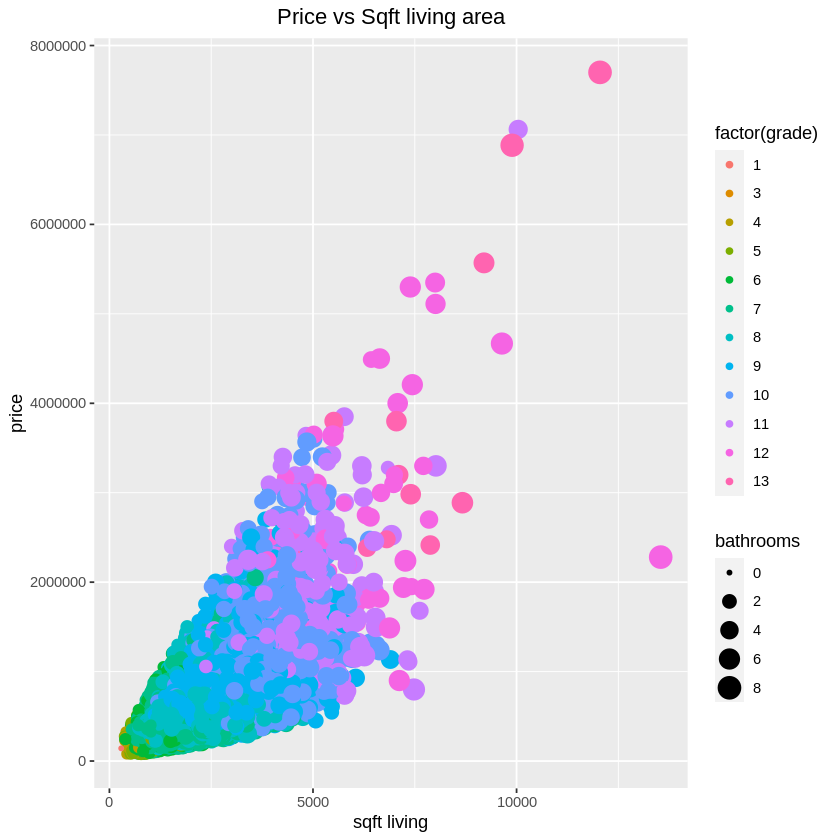

In [4]:
options(scipen = 999)  
library(ggplot2)
ggplot(housing_prices,
       aes(x = sqft_living,         # independent variable, feature 1
           y = price)) +            # dependent variable, feature 2
       xlab("sqft living") +
       ylab("price") + 
       ggtitle("Price vs Sqft living area") +
       theme(plot.title = element_text(hjust = 0.5)) + 
       geom_point(aes(color = factor(grade), size = bathrooms))   # independent variables, features 3 and 4

Houses with 0 bathrooms and 0 bedrooms are typical outliers. 
Let's remove those rows and redo the plot above. 

In [5]:
housing_prices = housing_prices[!housing_prices$bedrooms %in% c(0) & !housing_prices$bathrooms %in% c(0),]

`geom_smooth()` using formula 'y ~ x'



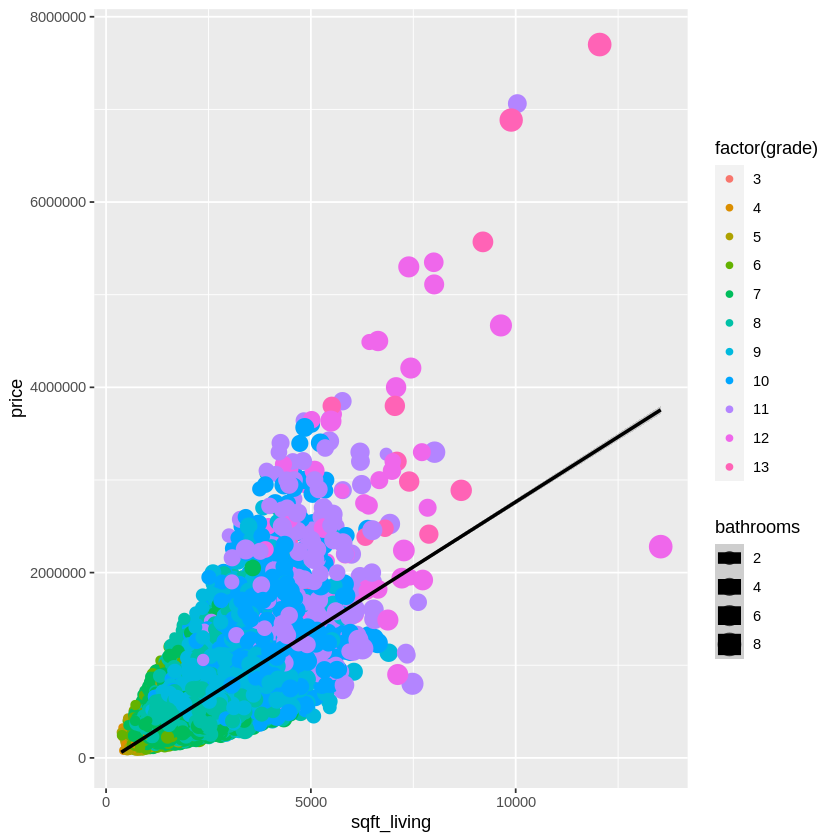

In [6]:
ggplot(housing_prices,
       aes(x = sqft_living,
           y = price,
           color = factor(grade),
           size = bathrooms),
       xlab("sqft living"),
       ylab("price"),
       main("Prive vs Sqft living area")
      ) +geom_point() +geom_smooth(method = 'lm',color = 'black')

We have a nice visualization summarizing `price` against `sqft_living`, `grade` and `bathrooms`. 
Price is increasing linearly with increases in sqft_living. 
Big houses tend to have better grades. 

However, we are not able to interpret the size of the datapoints clearly for number of bathrooms. 
This is the limitation with visualizations. 
When the data becomes huge, plots become difficult to interpret.

Let's try to denote `bathrooms` with color and `sqft_above` with grade... 

`geom_smooth()` using formula 'y ~ x'



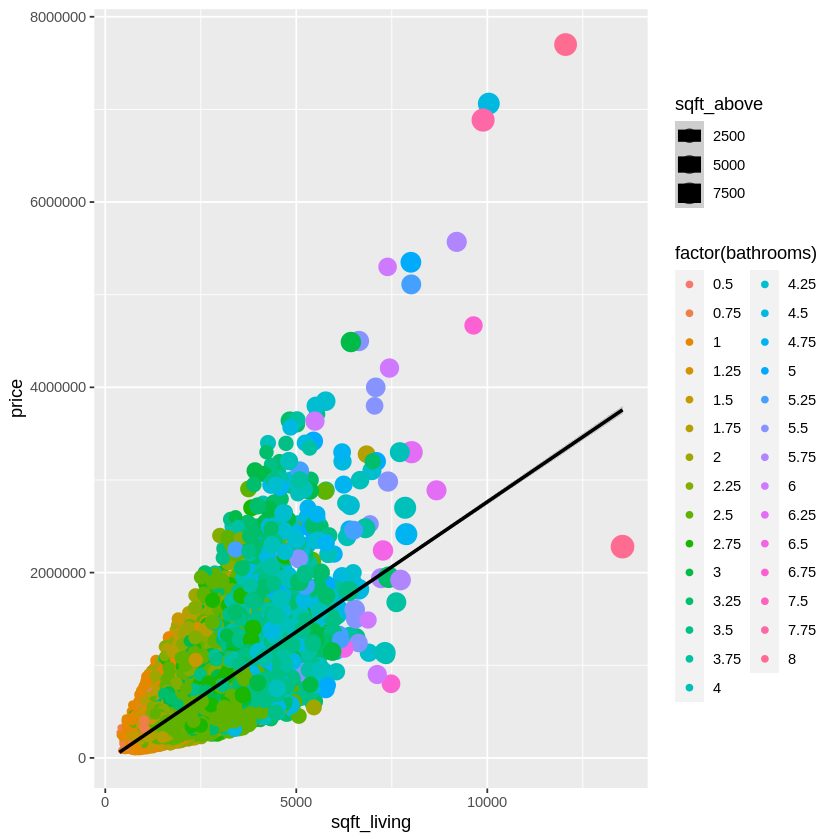

In [7]:
ggplot(housing_prices,
       aes(x = sqft_living,
           y = price,
           color = factor(bathrooms),
           size = sqft_above),
       xlab("sqft living"),ylab("price"),
       main("Prive vs Sqft living area")
      ) +geom_point() +geom_smooth(method = 'lm',color = 'black')

The plot does well summarizing `price` against `sqft_living` but explains little about how `price` is correlates with `sqft_above` or number of `bathrooms`. 
The size of the datapoints denote the sqft_above. 
Since the observations are closely packed we are not able to identify the trend in the data along with `sqft_living`. 
Bathrooms, when used as a factor, has 29 levels which are difficult to interpret with such subtle changes and the closely clustered data. 

We can try the same thing with a 3-dimensional plot to see if the size and color parameters help us in analyzing multiple dimensions in the data. 

__Reference__: [with() function](http://rfunction.com/archives/2182)  
__Reference__: [Scatter Plot 3D](https://cran.r-project.org/web/packages/scatterplot3d/scatterplot3d.pdf)  
__Reference__: [Guide to using Scatter Plot 3D](http://www.sthda.com/english/wiki/scatterplot3d-3d-graphics-r-software-and-data-visualization)

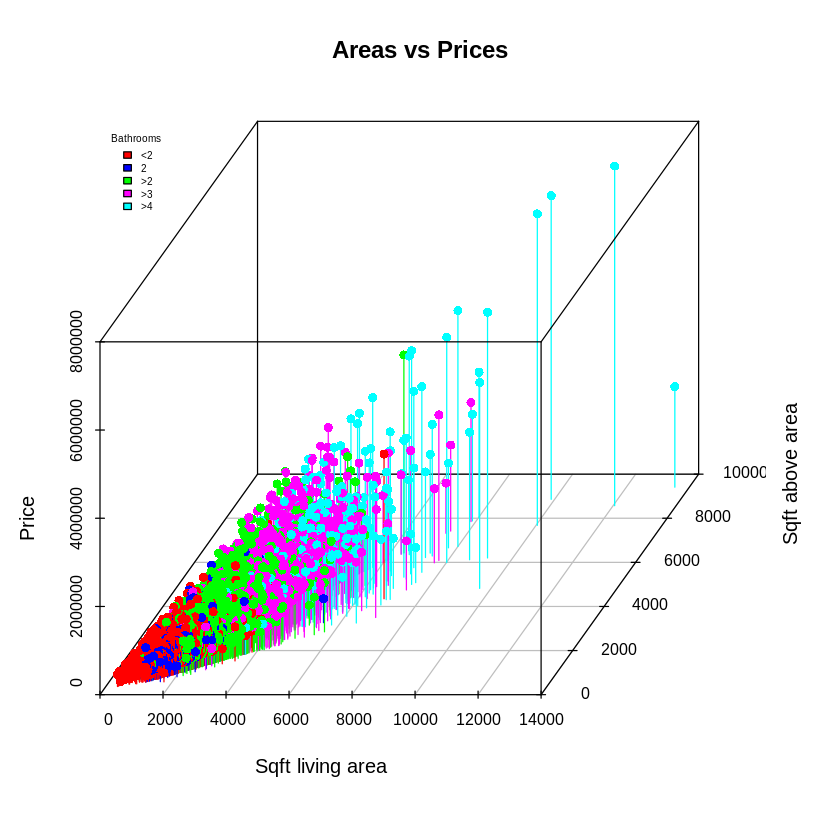

In [8]:
library(scatterplot3d)
#Assigning a color to ranges of bathrooms
housing_prices$colors[housing_prices$bathrooms < 2] <- "red"
housing_prices$colors[housing_prices$bathrooms == 2] <- "blue"
housing_prices$colors[housing_prices$bathrooms > 2] <- "green"
housing_prices$colors[housing_prices$bathrooms > 3] <- "magenta"
housing_prices$colors[housing_prices$bathrooms > 4] <- "cyan"


with(housing_prices, {
   # The scatter plot 3D was introduced in the extra / optional notebooks last week.
   # This function produces a three dimensional plot of points using 3 variables for position, instead of just 2.
   # x = sqft_living, y = sqft_above, z = price        
   scatterplot3d(sqft_living, sqft_above, price,       
                 type = "h",             # adds lines from the points to the horizontal plane
                 angle = 45,           # changes the point-of-view angle
                 pch = 16,             # pch = 16 denotes shape used to denote points on the plot
                 color = housing_prices$colors,  # uses the colors defined above
                 main = "Areas vs Prices",        
                 xlab = "Sqft living area",
                 ylab = "Sqft above area",
                 zlab = "Price")

legend("topleft", inset = .05,      # specifies location where the legend should be positioned on the graph
    bty = "n", cex = .5,              # suppresses box drawn around legend box; shrinks text by 50%
    title = "Bathrooms", 
    c("<2", "2", ">2", ">3", ">4"), fill = c("red", "blue", "green", "magenta", "cyan"))
})  # ends the context of the with() function

While we have been able to incorporate additional features of the data into the plot, we can see we have reached the limit in dimensionality of the data that can be visually inspected.

